# Olympic Medals Dataset

- **The complete code/data and other files can be found at: [Github Repo](https://github.com/theDrake1010/skill-dev-lab/tree/master/lab-3)**
- Dataset can be found in `../data` folder or downloaded using the script file in the same folder


The [Olympics medals dataset](https://www.kaggle.com/the-guardian/olympic-games) contains data for the olympic medals given out from 1896 to 2014


## Config

All globally used variables declared here and dataset is downloaded

- **Ensure you have [Kaggle Credentials JSON](https://github.com/Kaggle/kaggle-api#api-credentials) in `~/.kaggle` folder if you are downloading dataset**


In [25]:
## Give execution permissions to the shell file
## The shell file downloads dataset, extracts it and removes the zip

## SKIP THIS CELL IF YOU SEE THE CSVs IN THE ../data DIRECTORY!

!chmod 744 ../data/download_data.sh
!bash ../data/download_data.sh

Requirement already up-to-date: kaggle in /home/akhil/anaconda3/lib/python3.7/site-packages (1.5.10)
  0%|                                                | 0.00/483k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 483k/483k [00:00<00:00, 6.42MB/s]
Archive:  olympic-games.zip
  inflating: dictionary.csv          
  inflating: summer.csv              
  inflating: winter.csv              


Dataset downloaded and extracted: 
dictionary.csv	download_data.sh  summer.csv  winter.csv


In [4]:
DATA_DIR = "../data"

## Loading the data

Loading and checking out the dataset

In [2]:
import os
import numpy as np
import pandas as pd

In [5]:
all_csvs = [f for f in os.listdir(DATA_DIR) if f.endswith(".csv")]
all_csvs

['dictionary.csv', 'winter.csv', 'summer.csv']

In [6]:
data = {csv_name[:-4]:pd.read_csv(os.path.join(DATA_DIR,csv_name)) for csv_name in all_csvs}

In [7]:
data["dictionary"].head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [8]:
data["summer"].head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [9]:
data["winter"].head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [10]:
## Assert all columns and their order to be same

assert all(data["winter"].columns == data["summer"].columns)

## Understanding from loading the data

There are 3 CSVs:

    1. dictionary.csv : Has the name of countries, their Code, Population and Per Cap GDP
    2. winter.csv     : Has the medals awarded per person-event basis along with where it was held (For winter sports) 
    3. summer.csv     : Has the medals awarded per person-event basis along with where it was held (For summer sports)

## Creating a single dataframe from all CSVs

1. Add a column to distinguish winter and summer sports.
2. Merge the csvs into one

In [12]:
data["winter"].insert(1,column="Type",value="winter",allow_duplicates=True)
data["summer"].insert(1,column="Type",value="summer",allow_duplicates=True)

df = pd.concat([data["winter"], data["summer"]])

In [13]:
df.head()

,Year,Type,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,winter,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,winter,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,winter,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,winter,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,winter,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


## Taking a look at data

- Year         : The year when the event was held
- Type         : Whether it happened in summer or winter
- City         : Which city it occured in
- Sport        : What category of sports the event falls in
- Discipline   : _[TODO] : How does this differ from Sport? Can we remove this?_
- Athlete      : The person who was awarded a medal _(Further referred as "awardee")_
- Country      : The country the awardee was representing
- Gender       : The Gender of the awardee
- Event        : For which event was the medal awarded
- Medal       : Which medal was awarded

## Cleaning the data

1. Check the datatypes
2. Remove any null or NaNs
3. Resolve Country code to Country names
4. Any other corrections needed if found in exploration

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36935 entries, 0 to 31164
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Year        36935 non-null  int64 
 1   Type        36935 non-null  object
 2   City        36935 non-null  object
 3   Sport       36935 non-null  object
 4   Discipline  36935 non-null  object
 5   Athlete     36935 non-null  object
 6   Country     36931 non-null  object
 7   Gender      36935 non-null  object
 8   Event       36935 non-null  object
 9   Medal       36935 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.1+ MB


In [15]:
df.isna().sum()

Year          0
Type          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       4
Gender        0
Event         0
Medal         0
dtype: int64

In [16]:
df[df.Country.isna()]

,Year,Type,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
29603,2012,summer,London,Athletics,Athletics,Pending,NaN,Women,1500M,Gold
31072,2012,summer,London,Weightlifting,Weightlifting,Pending,NaN,Women,63KG,Gold
31091,2012,summer,London,Weightlifting,Weightlifting,Pending,NaN,Men,94KG,Silver
31110,2012,summer,London,Wrestling,Wrestling Freestyle,"KUDUKHOV, Besik",NaN,Men,Wf 60 KG,Silver


In [17]:
df.dropna(inplace=True)
df.isna().sum()

Year          0
Type          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
dtype: int64

In [18]:
m = {row["Code"]:row["Country"] for i,row in data["dictionary"].iterrows()}

In [19]:
m["AFG"],m["IND"],m["USA"]

('Afghanistan', 'India', 'United States')

In [20]:
df.Country.replace(m,inplace=True)

In [21]:
df.head(10)

,Year,Type,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,winter,Chamonix,Biathlon,Biathlon,"BERTHET, G.",France,Men,Military Patrol,Bronze
1,1924,winter,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",France,Men,Military Patrol,Bronze
2,1924,winter,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",France,Men,Military Patrol,Bronze
3,1924,winter,Chamonix,Biathlon,Biathlon,"VANDELLE, André",France,Men,Military Patrol,Bronze
4,1924,winter,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",Switzerland,Men,Military Patrol,Gold
5,1924,winter,Chamonix,Biathlon,Biathlon,"JULEN, Alphonse",Switzerland,Men,Military Patrol,Gold
6,1924,winter,Chamonix,Biathlon,Biathlon,"JULEN, Ant.",Switzerland,Men,Military Patrol,Gold
7,1924,winter,Chamonix,Biathlon,Biathlon,"VAUCHER, D.",Switzerland,Men,Military Patrol,Gold
8,1924,winter,Chamonix,Biathlon,Biathlon,"BREMER, V.E.",Finland,Men,Military Patrol,Silver
9,1924,winter,Chamonix,Biathlon,Biathlon,"ESKELINEN, A.",Finland,Men,Military Patrol,Silver


In [22]:
df.shape

(36931, 10)

In [23]:
df.isna().sum()

Year          0
Type          0
City          0
Sport         0
Discipline    0
Athlete       0
Country       0
Gender        0
Event         0
Medal         0
dtype: int64

*There are some Country Codes which dont get mapped since these countries are non-existent or have dissolved to form other countries*

Some of them include:

- URS --> Soviet Union(USSR)
- ANZ --> Australia New Zealand


## Plotting graphs

1. Distirubtion of medals won per country (Voilinplot)

In [38]:
!pip install plotly

     |████████████████████████████████| 13.2 MB 1.1 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11430 sha256=dc59983eb119df3f9ccda49e4d9512f90b163395fae8958a5d063340bdc00082
  Stored in directory: /home/akhil/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [24]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import plotly


In [25]:
df.head()

,Year,Type,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,winter,Chamonix,Biathlon,Biathlon,"BERTHET, G.",France,Men,Military Patrol,Bronze
1,1924,winter,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",France,Men,Military Patrol,Bronze
2,1924,winter,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",France,Men,Military Patrol,Bronze
3,1924,winter,Chamonix,Biathlon,Biathlon,"VANDELLE, André",France,Men,Military Patrol,Bronze
4,1924,winter,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",Switzerland,Men,Military Patrol,Gold


In [26]:
medal_count_by_country = df.groupby(by=["Country"]).count().sort_values("Medal",ascending=False)

In [27]:
medal_count_by_country.head()

,Year,Type,City,Sport,Discipline,Athlete,Gender,Event,Medal
Country,,,,,,,,,
United States,5238,5238,5238,5238,5238,5238,5238,5238,5238
URS,2489,2489,2489,2489,2489,2489,2489,2489,2489
United Kingdom,1799,1799,1799,1799,1799,1799,1799,1799,1799
Germany,1665,1665,1665,1665,1665,1665,1665,1665,1665
France,1548,1548,1548,1548,1548,1548,1548,1548,1548


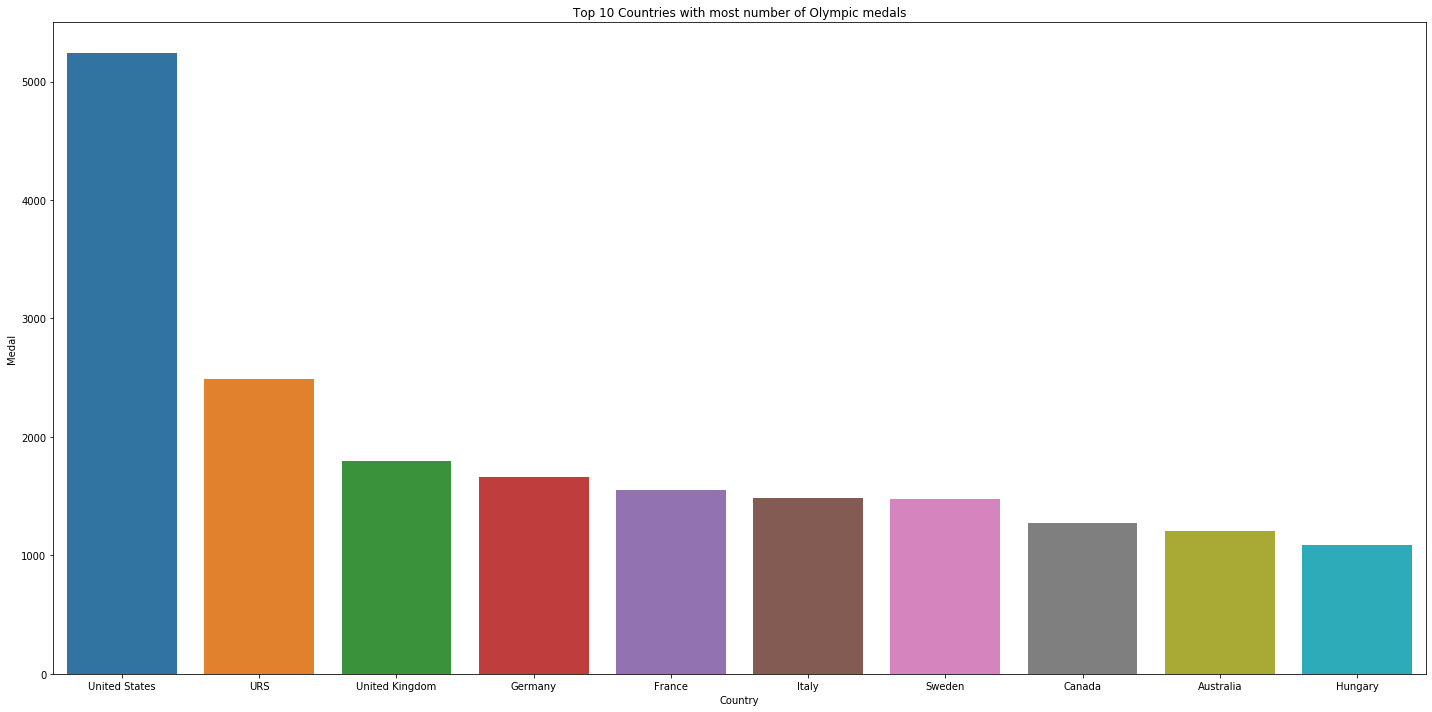

In [56]:
plt.figure(figsize=(20,10))
sns.barplot(x=medal_count_by_country.index[:10],y=medal_count_by_country.Medal[:10])

plt.title("Top 10 Countries with most number of Olympic medals")
plt.tight_layout()
plt.show()

_Surprisingly, China isnt on the top 10 list..._

In [37]:
medal_count_by_country.loc["China"].Medal

889

In [30]:
medal_count_by_country_and_time = df.groupby(["Country","Year"]).count().Medal

In [31]:
medal_count_by_country_and_time.head()

Country      Year
ANZ          1908    19
             1912    10
Afghanistan  2008     1
             2012     1
Algeria      1984     2
Name: Medal, dtype: int64

In [32]:
medal_count_by_country_and_time.index.get_level_values(0)

Index(['ANZ', 'ANZ', 'Afghanistan', 'Afghanistan', 'Algeria', 'Algeria',
       'Algeria', 'Algeria', 'Algeria', 'Algeria',
       ...
       'YUG', 'YUG', 'ZZX', 'ZZX', 'ZZX', 'Zambia', 'Zambia', 'Zimbabwe',
       'Zimbabwe', 'Zimbabwe'],
      dtype='object', name='Country', length=1323)

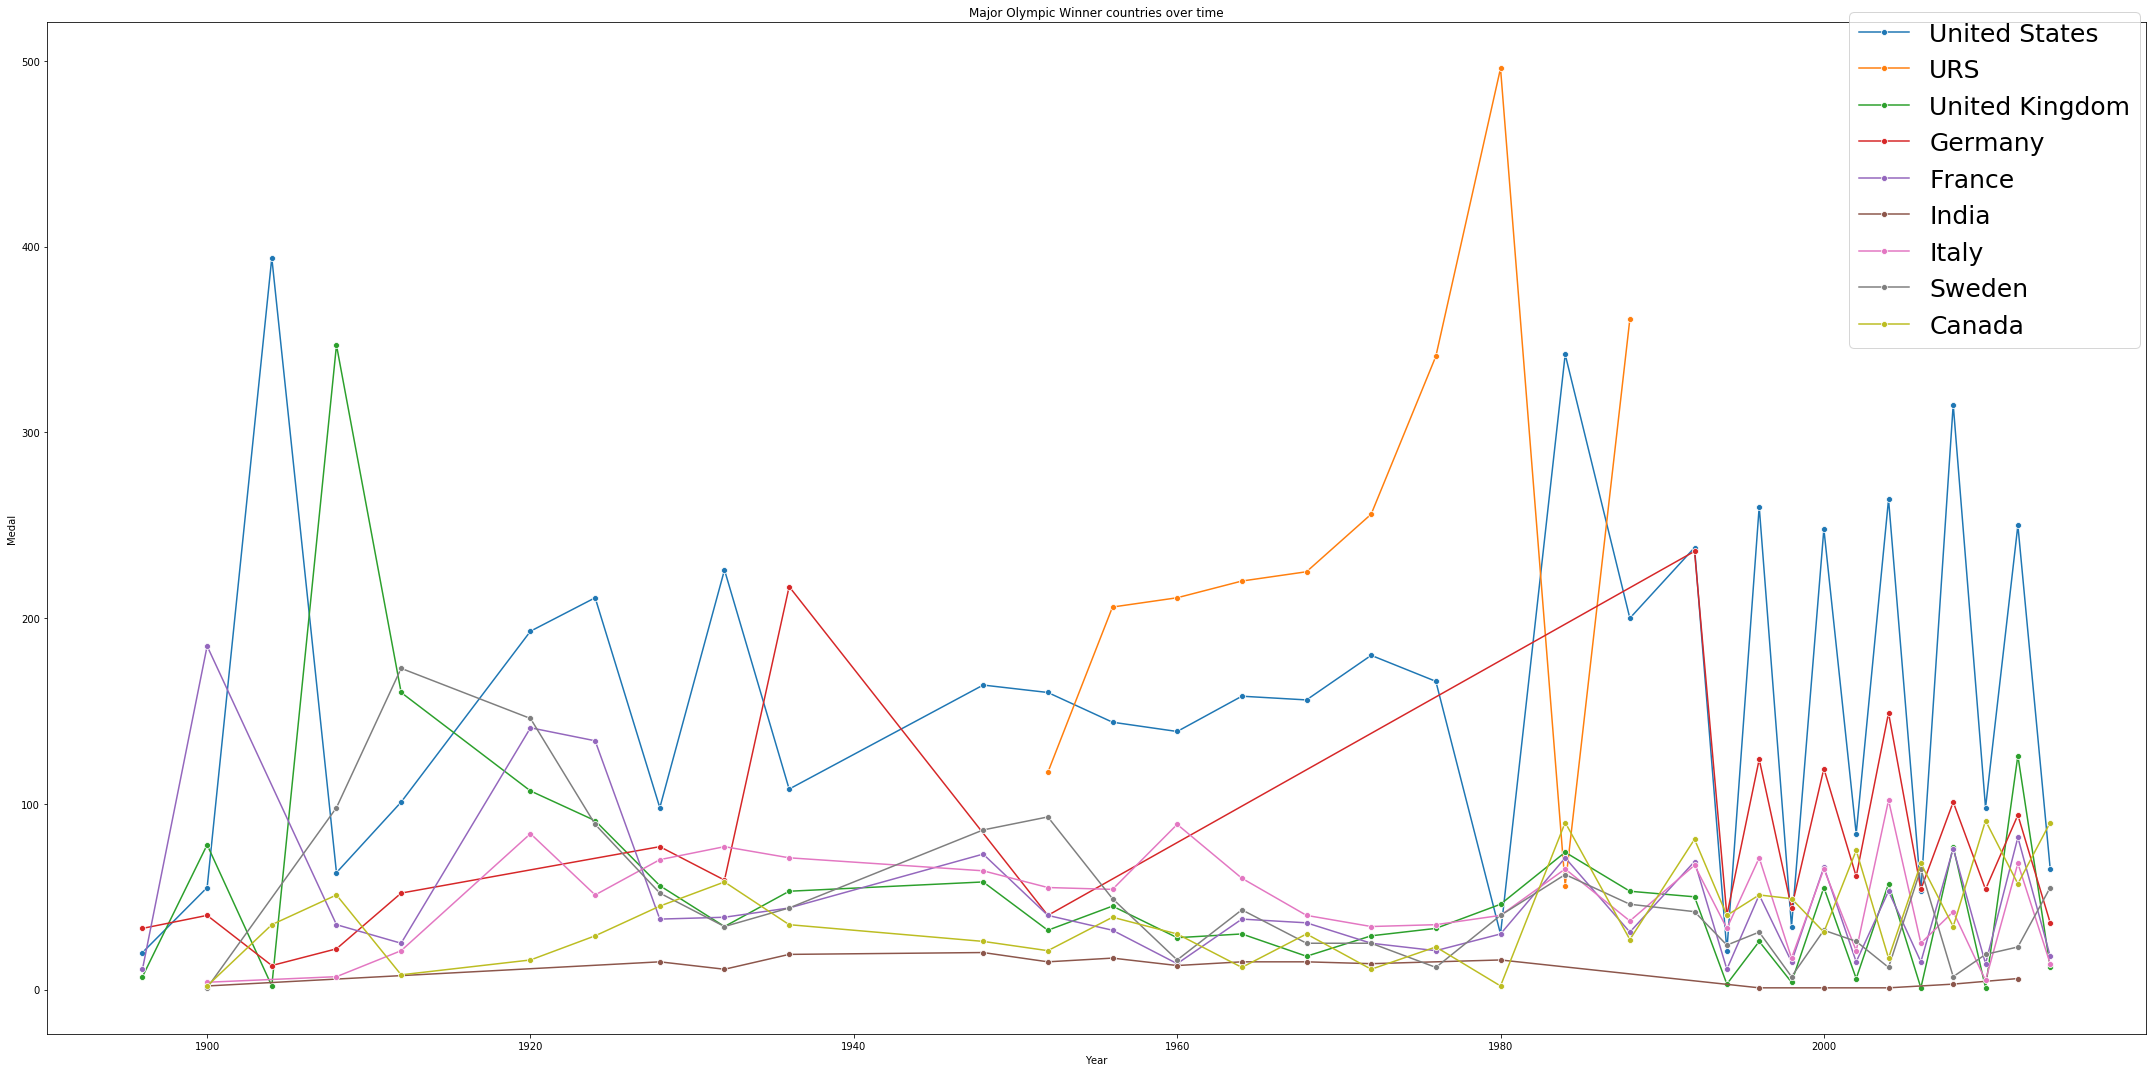

In [62]:
fig = plt.figure(figsize=(30,15))

countries=["United States","URS","United Kingdom","Germany","France","India","Italy","Sweden","Canada"]
for country in countries:
    timeseries = medal_count_by_country_and_time[country]
    sns.lineplot(timeseries.index,timeseries,marker="o")
fig.legend(labels=countries,prop={'size': 25})
plt.title("Major Olympic Winner countries over time")
plt.tight_layout()
plt.show()

_The Soviets got 500 medals out of a single year near the late 70s!_

In [39]:
medal_count_by_country_and_time["URS"]

Year
1952    117
1956    206
1960    211
1964    220
1968    225
1972    256
1976    341
1980    496
1984     56
1988    361
Name: Medal, dtype: int64

In [50]:
medal_count_by_gender_and_time = df.groupby(["Gender","Year"]).count().Medal

In [51]:
medal_count_by_gender_and_time.head()

Gender  Year
Men     1896    151
        1900    501
        1904    458
        1908    789
        1912    855
Name: Medal, dtype: int64

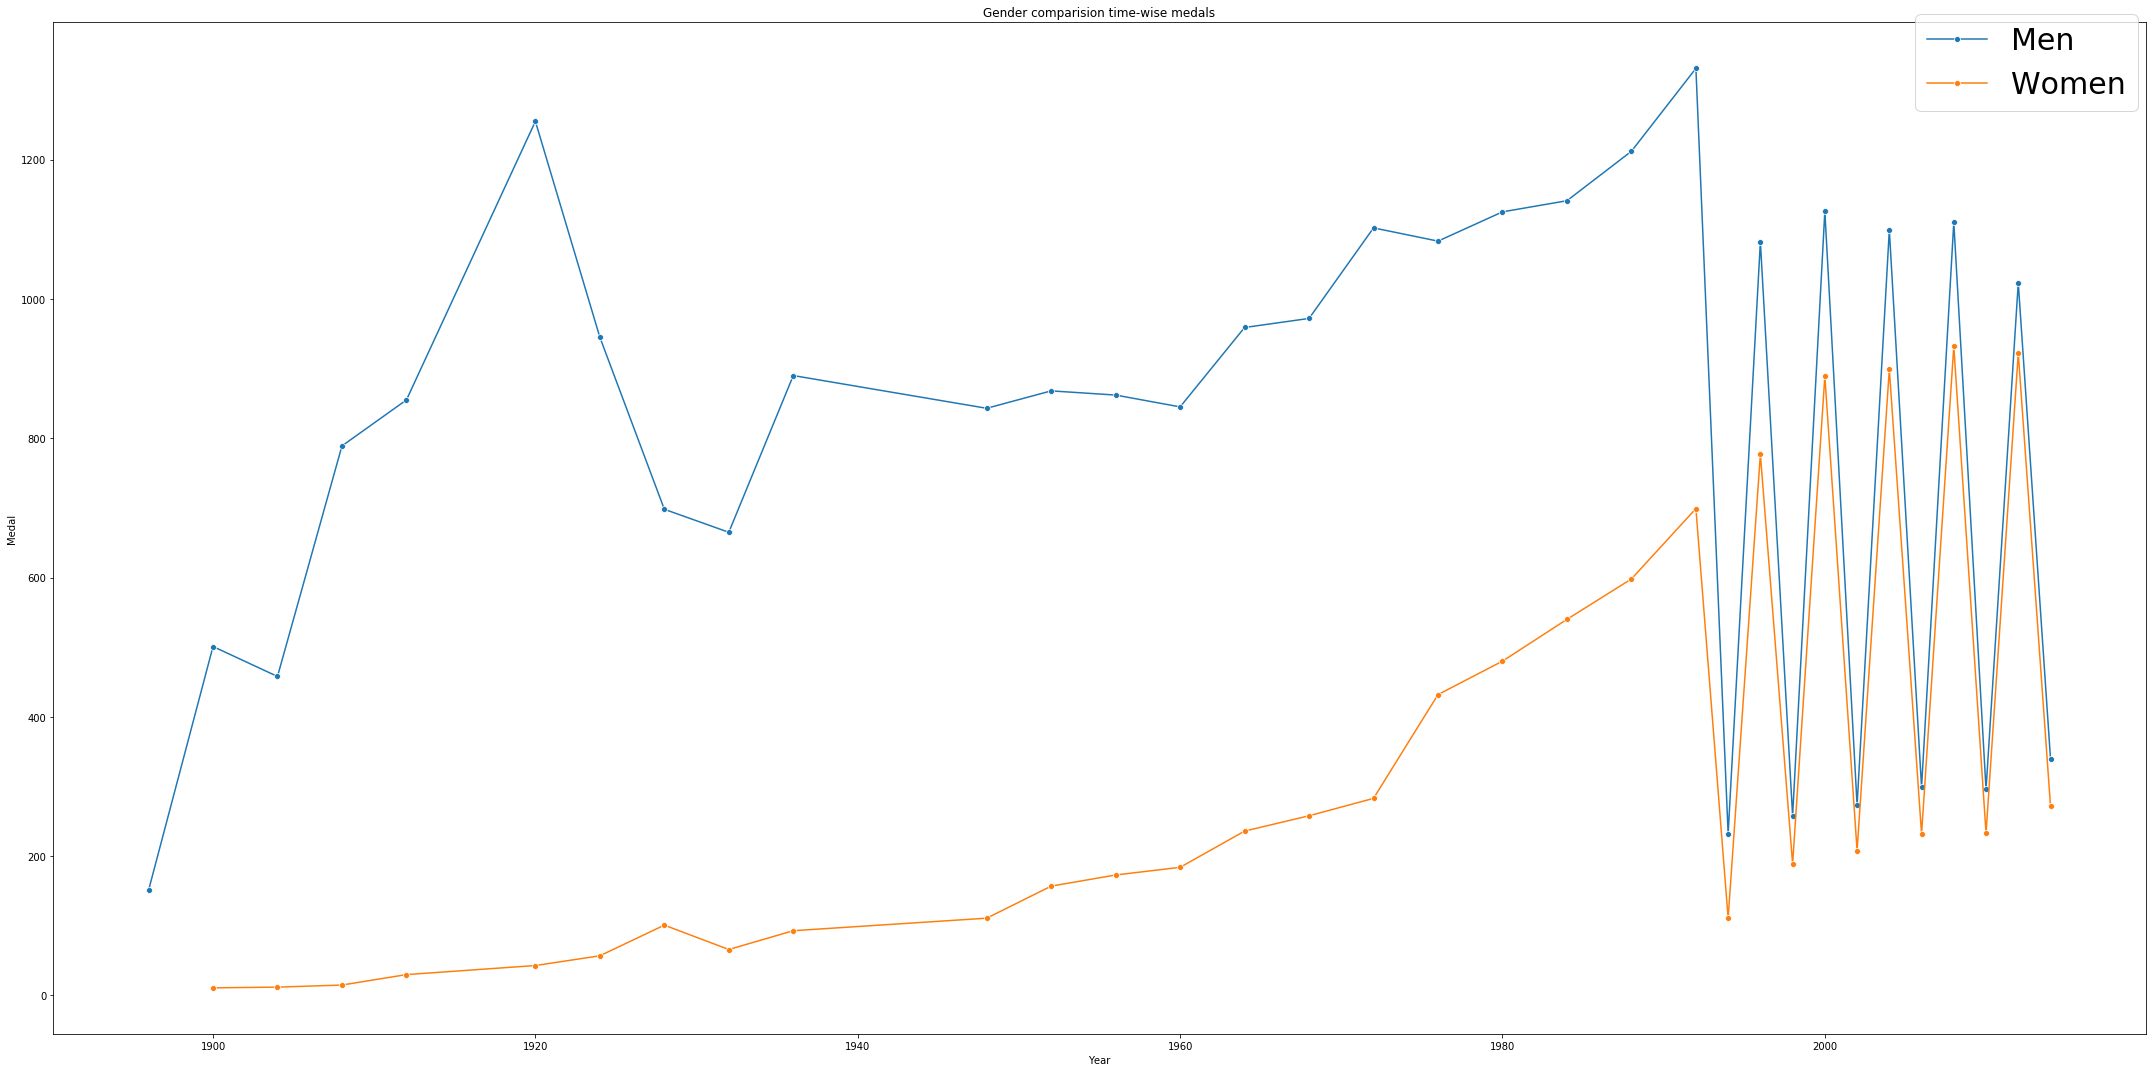

In [60]:
fig = plt.figure(figsize=(30,15))

genders = ["Men","Women"]

for gender in genders:
    timeseries = medal_count_by_gender_and_time[gender]
    sns.lineplot(timeseries.index,timeseries,marker="o")
fig.legend(labels=genders,prop={'size': 30})
plt.title("Gender comparision time-wise medals")
plt.tight_layout()
plt.show()

*Women started participating in olympics since 1900 but had significantly less number of medals...Probably as the number of Sports/Disciplines were less for women compared to men*

In [79]:
medal_count_by_country_and_type = df.groupby(["Country","Medal"]).count().Event.unstack().fillna(0)

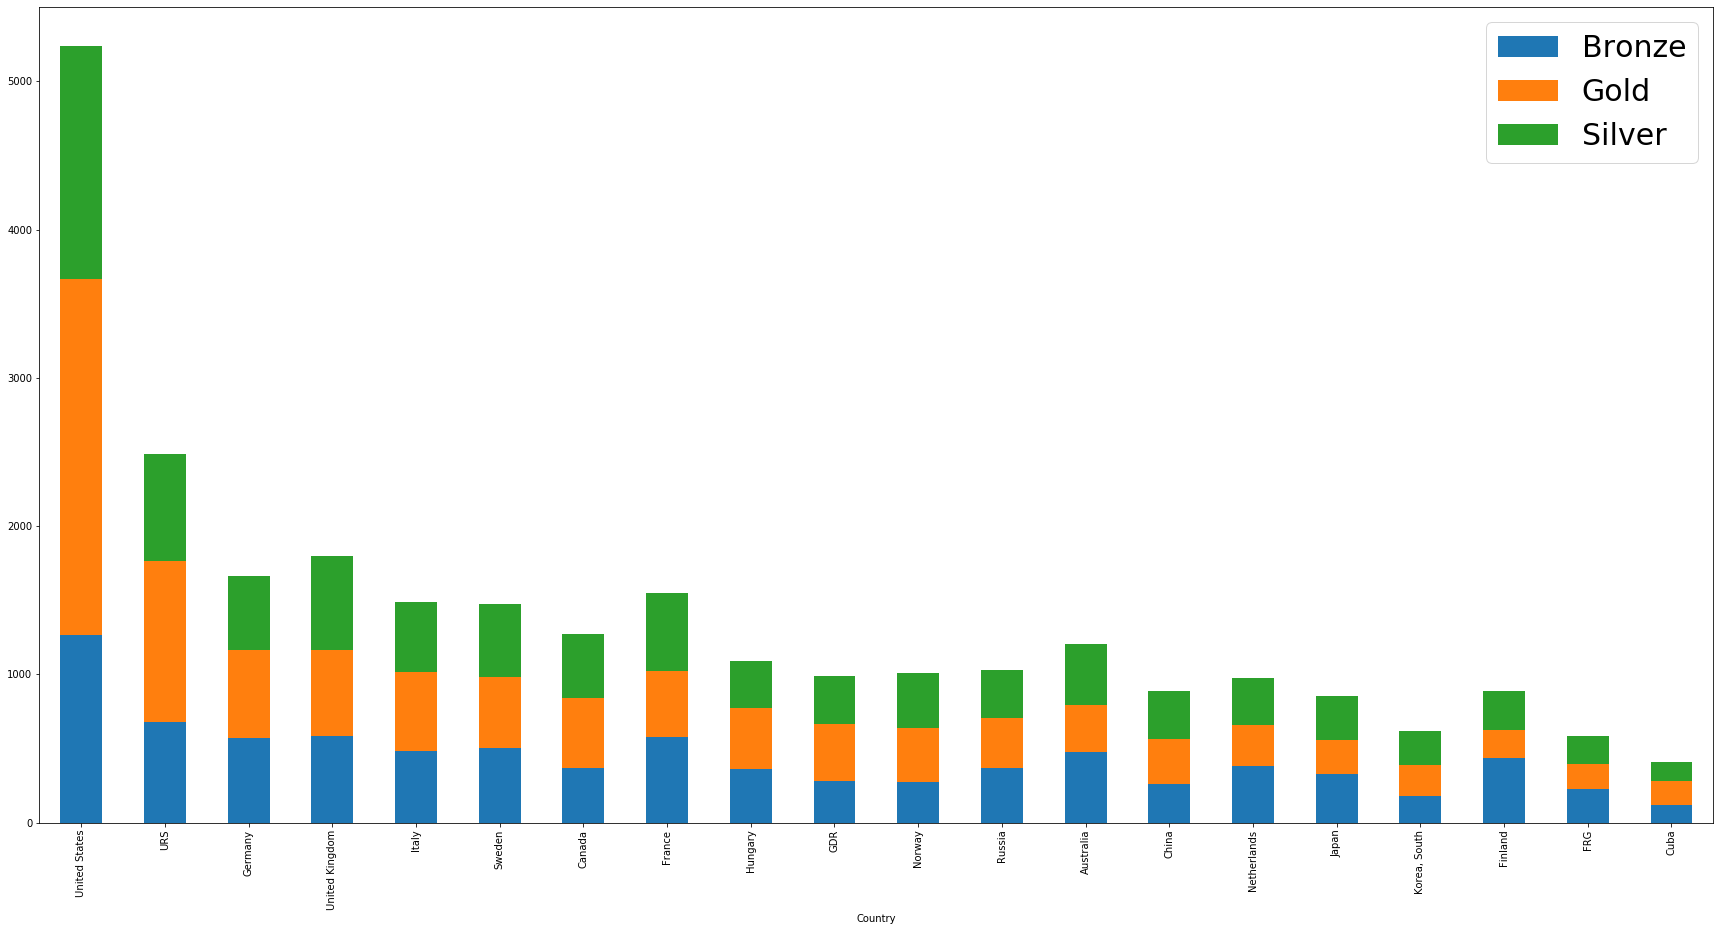

In [86]:
medal_count_by_country_and_type.sort_values(by="Gold",ascending=False)[:20].plot.bar(stacked=True,figsize=(30,15))
plt.legend(prop={'size': 30})
plt.show()

*GDR or the German Democratic Republic (aka East/Soviet Germany) had more gold medals collected than China or Russia!*